In [71]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

# new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/CNT_AGNR'
# os.chdir(new_path)

In [72]:
# def expand_sparse_self_energy(sigma_small, index_active, target_size,
#                               target_range):
#     """
#     Expand a sparse self-energy matrix to a dense matrix of size (target_size, target_size),
#     inserting values only at the positions that lie within target_range.

#     Parameters
#     ----------
#     sigma_small : np.ndarray
#         (n_active, n_active) self-energy matrix in the active subspace.
#     index_active : np.ndarray
#         Indices in the full space where the active orbitals reside.
#     target_size : int
#         Size of the expanded self-energy matrix (typically a lead block size).
#     target_range : tuple
#         (start, end) range in full space corresponding to the lead region.

#     Returns
#     -------
#     sigma_expanded : np.ndarray
#         (target_size, target_size) full-sized self-energy with values inserted at appropriate indices.
#     """
#     # start, end = target_range
#     start, end = 0, target_size
#     sigma_expanded = np.zeros((target_size, target_size), dtype=float)

#     # Map global indices to local within the lead block
#     local_indices = np.array(
#         [i - start for i in index_active if start <= i < end])
#     if len(local_indices) == 0:
#         raise ValueError("No active orbitals found in the target range.")

#     for i_new, i_old in enumerate(local_indices):
#         for j_new, j_old in enumerate(local_indices):
#             sigma_expanded[i_old, j_old] = sigma_small[i_new, j_new]

#     return sigma_expanded


In [73]:
def expand_sparse_self_energy(sigma_small, index_active, target_size, target_range):
    """
    Expand a sparse self-energy matrix to a dense matrix of size (target_size, target_size),
    inserting values only at the positions that lie within target_range.

    Parameters
    ----------
    sigma_small : np.ndarray
        (n_active, n_active) self-energy matrix in the active subspace.
    index_active : np.ndarray
        Indices in the full space where the active orbitals reside.
    target_size : int
        Size of the expanded self-energy matrix (typically a lead block size).
    target_range : tuple
        (start, end) range in full space corresponding to the lead region.

    Returns
    -------
    sigma_expanded : np.ndarray
        (target_size, target_size) full-sized self-energy with values inserted at appropriate indices.
    """

    start, end = target_range
    sigma_expanded = np.zeros((target_size, target_size), dtype=complex)

    # Map global indices to local within the lead block
    active_indices = np.array([i for i in index_active if start <= i < end]) - start

    print("start",start)
    print("end",end)
    print("active_indices",active_indices)
    for i_small, i_large in enumerate(active_indices):
        for j_small, j_large in enumerate(active_indices):
            sigma_expanded[i_large, j_large] = sigma_small[i_small, j_small]

    return sigma_expanded


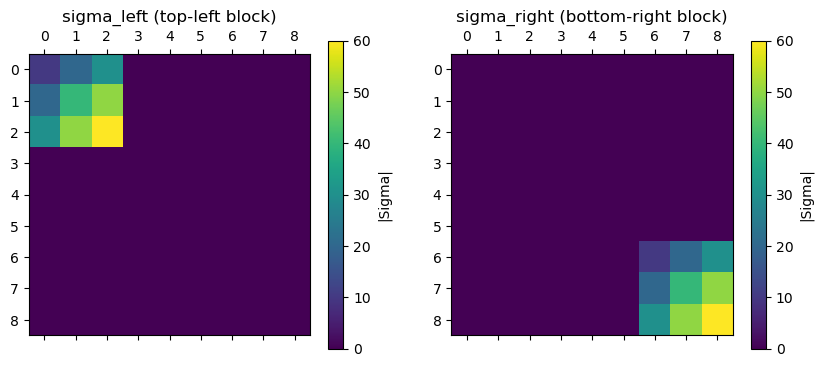

In [74]:
block = np.array([
    [10, 20, 30],
    [20, 40, 50],
    [30, 50, 60]
])

sigma_left = np.zeros((9, 9), dtype=float)
sigma_left[:3, :3] = block

sigma_right = np.zeros((9, 9))
sigma_right[-3:, -3:] = block

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.matshow(np.abs(sigma_left), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_left (top-left block)")

plt.subplot(1,2,2)
plt.matshow(np.abs(sigma_right), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_right (bottom-right block)")

plt.show()


In [75]:
target_range = (0, 18)
target_size = target_range[1] - target_range[0]
index_active_region = np.array([0,1,3,6,7,9,14,16,17])


sigma_left_expanded = expand_sparse_self_energy(
    sigma_small=sigma_left,
    index_active=index_active_region,
    target_size=target_size,
    target_range=target_range
)

sigma_right_expanded = expand_sparse_self_energy(
    sigma_small=sigma_right,
    index_active=index_active_region,
    target_size=target_size,
    target_range=target_range
)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.matshow(np.abs(sigma_left_expanded), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_left (top-left block)")

plt.subplot(1,2,2)
plt.matshow(np.abs(sigma_right_expanded), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_right (bottom-right block)")

plt.show()

start 0
end 18
active_indices [ 0  1  3  6  7  9 14 16 17]
start 0
end 18
active_indices [ 0  1  3  6  7  9 14 16 17]
Abort is in progress...hit ctrl-c again within 5 seconds to forcibly terminate



KeyboardInterrupt: 

In [ ]:
data_folder = "../unrelaxed/output/no_lowdin/device"
self_energy = np.load(f"{data_folder}/self_energy.npy", allow_pickle=True)
nodes = np.load(f"{data_folder}/nodes.npy")
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
print("self_energy_shape",self_energy[0].shape)
print("nodes",nodes)
print("index active region", index_active_region)


self_energy_shape (648, 648)
nodes [    0  3888  6736 10624]
index active region [    3    12    21 ... 10600 10609 10618]


/tmp/ipykernel_698329/4127316995.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


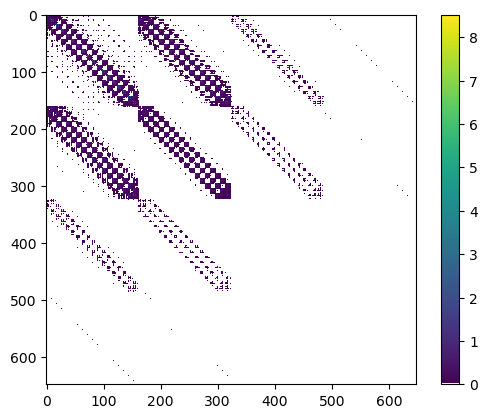

In [ ]:
se_left = self_energy[0].retarded(0).real

cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]  # Set the minimum color to white (RGBA)

new_cmap = ListedColormap(new_colors)
# Plot
# plt.imshow(np.abs(se_left[0:150,0:150]), cmap=new_cmap)
plt.imshow(np.abs(se_left), cmap=new_cmap)
plt.colorbar()
plt.show()


In [ ]:
se_right = self_energy[1].retarded(0).real

plt.imshow(np.abs(se_right), cmap=new_cmap)
plt.colorbar()
plt.show()


KeyboardInterrupt: 

In [ ]:
sigma_left = expand_sparse_self_energy(
    sigma_small=se_left,
    index_active=index_active_region,
    target_size=nodes[1] - nodes[0],
    target_range=(nodes[0], nodes[1])
)


start 0
end 3888
active_indices [   3   12   21   30   39   48   57   66   75   84   93  102  111  120
  129  138  147  156  165  174  183  192  201  210  219  228  237  246
  255  264  273  282  291  300  309  318  327  336  345  354  363  372
  381  390  399  408  417  426  435  444  453  462  471  480  489  498
  507  516  525  534  543  552  561  570  579  588  597  606  615  624
  633  642  651  660  669  678  687  696  705  714  723  732  741  750
  759  768  777  786  795  804  813  822  831  840  849  858  867  876
  885  894  903  912  921  930  939  948  957  966  975  984  993 1002
 1011 1020 1029 1038 1047 1056 1065 1074 1083 1092 1101 1110 1119 1128
 1137 1146 1155 1164 1173 1182 1191 1200 1209 1218 1227 1236 1245 1254
 1263 1272 1281 1290 1299 1308 1317 1326 1335 1344 1353 1362 1371 1380
 1389 1398 1407 1416 1425 1434 1443 1452 1461 1470 1479 1488 1497 1506
 1515 1524 1533 1542 1551 1560 1569 1578 1587 1596 1605 1614 1623 1632
 1641 1650 1659 1668 1677 1686 1695 1704 1713

In [ ]:
sigma_right = expand_sparse_self_energy(
    sigma_small=se_right,
    index_active=index_active_region,
    target_size=nodes[3] - nodes[2],
    target_range=(nodes[2], nodes[3])
)

start 6736
end 10624
active_indices [   3   12   21   30   39   48   57   66   75   84   93  102  111  120
  129  138  147  156  165  174  183  192  201  210  219  228  237  246
  255  264  273  282  291  300  309  318  327  336  345  354  363  372
  381  390  399  408  417  426  435  444  453  462  471  480  489  498
  507  516  525  534  543  552  561  570  579  588  597  606  615  624
  633  642  651  660  669  678  687  696  705  714  723  732  741  750
  759  768  777  786  795  804  813  822  831  840  849  858  867  876
  885  894  903  912  921  930  939  948  957  966  975  984  993 1002
 1011 1020 1029 1038 1047 1056 1065 1074 1083 1092 1101 1110 1119 1128
 1137 1146 1155 1164 1173 1182 1191 1200 1209 1218 1227 1236 1245 1254
 1263 1272 1281 1290 1299 1308 1317 1326 1335 1344 1353 1362 1371 1380
 1389 1398 1407 1416 1425 1434 1443 1452 1461 1470 1479 1488 1497 1506
 1515 1524 1533 1542 1551 1560 1569 1578 1587 1596 1605 1614 1623 1632
 1641 1650 1659 1668 1677 1686 1695 1704 

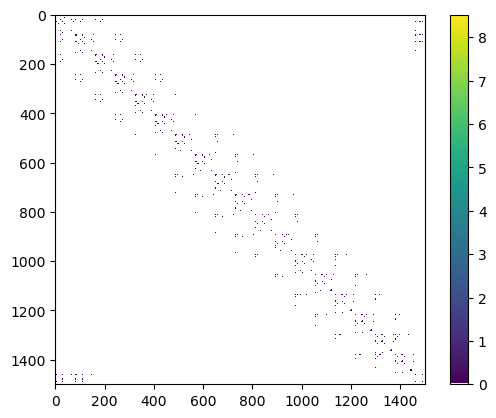

In [ ]:
plt.imshow(np.abs(sigma_left[0:1500,0:1500]), cmap=new_cmap)
plt.colorbar()
plt.show()

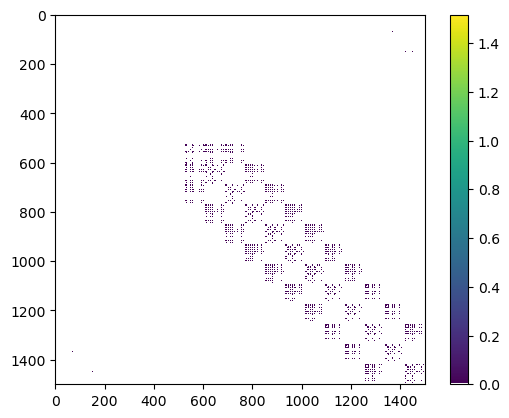

(array([   3,    3,    3, ..., 3882, 3882, 3882]),
 array([   3,   12,   21, ..., 3864, 3873, 3882]))

In [ ]:
plt.imshow(np.abs(sigma_right[-1500:,-1500:]), cmap=new_cmap)
plt.colorbar()
plt.show()
np.where(np.abs(sigma_right !=0))